#Load Dataset

In [ ]:
# Program untuk memuat dataset
import pandas as pd

# Membaca dataset
file_path = 'pestisida.csv'
data = pd.read_csv(file_path)

# Menampilkan informasi awal tentang dataset
print("Dataset sebelum pembersihan:")
print(data.head())

# Load a dataset of your choice and identify missing values.
print("\nMissing values in column:")
print(data.isnull().sum())

print("\n=== Data Types and Non-Null Counts ===")
print(data.info())

Dataset sebelum pembersihan:
  COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  HIGH_ESTIMATE
0      24D  2014           1          1.0        1698.6         1885.5
1      24D  2014           1          3.0        7513.6         8472.4
2      24D  2014           1          5.0        2613.6         2889.4
3      24D  2014           1          7.0        1259.2         1277.7
4      24D  2014           1          9.0        7590.5         7756.1

Missing values in column:
COMPOUND              0
YEAR                  0
STATE_CODE            0
COUNTY_CODE      117626
LOW_ESTIMATE       1401
HIGH_ESTIMATE    387288
dtype: int64

=== Data Types and Non-Null Counts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392433 entries, 0 to 392432
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   COMPOUND       392433 non-null  object 
 1   YEAR           392433 non-null  int64  
 2   STATE_CODE     392433 non-

#Handling Data

In [ ]:
# Program untuk menangani data
import numpy as np

# Menghitung rata-rata dan median untuk pengisian data numerik
mean_low_estimate = data['LOW_ESTIMATE'].mean()
median_high_estimate = data['HIGH_ESTIMATE'].median()
median_county_code = data['COUNTY_CODE'].median()

# Mengisi data numerik yang hilang dengan mean atau median
data['LOW_ESTIMATE'].fillna(mean_low_estimate, inplace=True)
data['HIGH_ESTIMATE'].fillna(median_high_estimate, inplace=True)
data['COUNTY_CODE'].fillna(median_county_code, inplace=True)

# Mengisi data kategorikal yang hilang dengan 'Unknown'
data['COMPOUND'].fillna('Unknown', inplace=True)

# Menghapus baris yang memiliki nilai hilang pada kolom penting
data.dropna(subset=['YEAR', 'STATE_CODE'], inplace=True)

# Menghapus baris yang masih memiliki nilai hilang di kolom lain
data.dropna(inplace=True)

# Memeriksa apakah ada nilai hilang setelah pembersihan
print("\nDataset setelah pembersihan:")
print(data.head())

# Menampilkan jumlah nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)

# Menyimpan dataset yang telah dibersihkan
data.to_csv('pestisida_cleaned.csv', index=False)
print("\nDataset yang telah dibersihkan disimpan ke 'pestisida_cleaned.csv'")


<ipython-input-4-86507bb90e97>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LOW_ESTIMATE'].fillna(mean_low_estimate, inplace=True)
<ipython-input-4-86507bb90e97>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True


Dataset setelah pembersihan:
  COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  HIGH_ESTIMATE
0      24D  2014           1          1.0        1698.6         1885.5
1      24D  2014           1          3.0        7513.6         8472.4
2      24D  2014           1          5.0        2613.6         2889.4
3      24D  2014           1          7.0        1259.2         1277.7
4      24D  2014           1          9.0        7590.5         7756.1

Jumlah nilai yang hilang di setiap kolom:
COMPOUND         0
YEAR             0
STATE_CODE       0
COUNTY_CODE      0
LOW_ESTIMATE     0
HIGH_ESTIMATE    0
dtype: int64

Dataset yang telah dibersihkan disimpan ke 'pestisida_cleaned.csv'


#Visualisasi

Dataset:
  COMPOUND  YEAR  STATE_CODE  COUNTY_CODE  LOW_ESTIMATE  HIGH_ESTIMATE
0      24D  2014           1          1.0        1698.6         1885.5
1      24D  2014           1          3.0        7513.6         8472.4
2      24D  2014           1          5.0        2613.6         2889.4
3      24D  2014           1          7.0        1259.2         1277.7
4      24D  2014           1          9.0        7590.5         7756.1


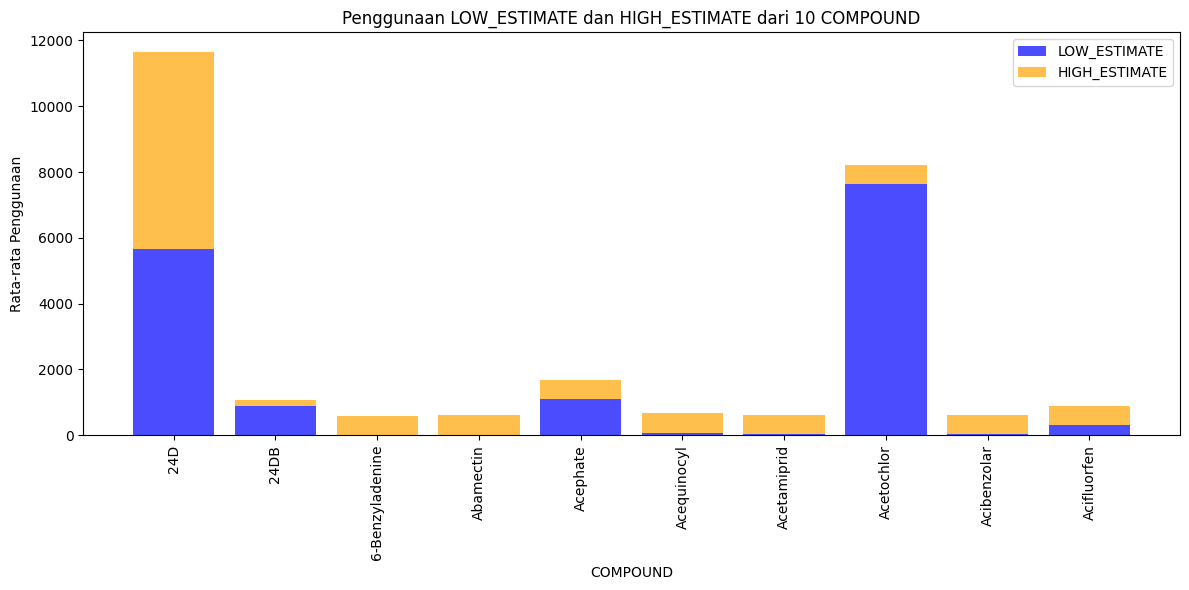

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset yang telah dibersihkan
file_path = 'pestisida_cleaned.csv'  # Sesuaikan path dengan file Anda
data = pd.read_csv(file_path)

# Memastikan data berhasil dimuat
print("Dataset:")
print(data.head())

# Menghitung rata-rata LOW_ESTIMATE dan HIGH_ESTIMATE untuk setiap COMPOUND
compound_usage = data.groupby('COMPOUND')[['LOW_ESTIMATE', 'HIGH_ESTIMATE']].mean().reset_index()

# Membatasi visualisasi untuk 10 COMPOUND pertama berdasarkan nama (atau kriteria lain jika diperlukan)
compound_usage_top10 = compound_usage.head(10)

# Visualisasi penggunaan LOW_ESTIMATE dan HIGH_ESTIMATE dari setiap COMPOUND
plt.figure(figsize=(12, 6))
x = range(len(compound_usage_top10['COMPOUND']))

plt.bar(x, compound_usage_top10['LOW_ESTIMATE'], color='blue', alpha=0.7, label='LOW_ESTIMATE')
plt.bar(x, compound_usage_top10['HIGH_ESTIMATE'], color='orange', alpha=0.7, label='HIGH_ESTIMATE', bottom=compound_usage_top10['LOW_ESTIMATE'])

plt.xticks(x, compound_usage_top10['COMPOUND'], rotation=90)
plt.title('Penggunaan LOW_ESTIMATE dan HIGH_ESTIMATE dari 10 COMPOUND')
plt.xlabel('COMPOUND')
plt.ylabel('Rata-rata Penggunaan')
plt.legend()
plt.tight_layout()
plt.show()


#Machine Learning

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when

# Membuat sesi Spark
spark = SparkSession.builder.appName("RandomForestClassification").getOrCreate()

# Membaca dataset
file_path = 'pestisida_cleaned.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Menampilkan informasi awal tentang dataset
print("Dataset sebelum diproses:")
data.show(5)
data.printSchema()

# Preprocessing data
# Menggunakan rata-rata estimasi untuk menentukan kategori
data = data.withColumn(
    "usage_category",
    when(((data['HIGH_ESTIMATE'] + data['LOW_ESTIMATE']) / 2) > 5000, 'Tinggi')  # Penggunaan tinggi jika rata-rata estimasi > 5000
    .otherwise('Rendah')
)

# Menampilkan contoh data setelah menambahkan kategori penggunaan
data.show(5)

# Mengonversi label menjadi indeks numerik untuk klasifikasi
label_column = 'usage_category'  # Kolom target baru
feature_columns = ['STATE_CODE', 'COUNTY_CODE', 'LOW_ESTIMATE', 'HIGH_ESTIMATE']

# Mengonversi label menjadi indeks numerik
indexer = StringIndexer(inputCol=label_column, outputCol='labelIndex')
data = indexer.fit(data).transform(data)

# Menggabungkan fitur menjadi satu vektor
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(data)

# Membagi dataset menjadi data latih dan data uji
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Membuat model Random Forest
rf = RandomForestClassifier(featuresCol='features', labelCol='labelIndex', numTrees=100, seed=42)

# Melatih model
rf_model = rf.fit(train_data)

# Mengevaluasi model pada data uji
predictions = rf_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol='labelIndex', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

# Menampilkan hasil evaluasi
print(f"Akurasi pada data uji: {accuracy}")

# Menampilkan beberapa prediksi
print("Beberapa prediksi:")
predictions.select('features', 'labelIndex', 'prediction', 'probability').show(10)

Dataset sebelum diproses:
+--------+----+----------+-----------+------------+-------------+
|COMPOUND|YEAR|STATE_CODE|COUNTY_CODE|LOW_ESTIMATE|HIGH_ESTIMATE|
+--------+----+----------+-----------+------------+-------------+
|     24D|2014|         1|        1.0|      1698.6|       1885.5|
|     24D|2014|         1|        3.0|      7513.6|       8472.4|
|     24D|2014|         1|        5.0|      2613.6|       2889.4|
|     24D|2014|         1|        7.0|      1259.2|       1277.7|
|     24D|2014|         1|        9.0|      7590.5|       7756.1|
+--------+----+----------+-----------+------------+-------------+
only showing top 5 rows

root
 |-- COMPOUND: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- STATE_CODE: integer (nullable = true)
 |-- COUNTY_CODE: double (nullable = true)
 |-- LOW_ESTIMATE: double (nullable = true)
 |-- HIGH_ESTIMATE: double (nullable = true)

+--------+----+----------+-----------+------------+-------------+--------------+
|COMPOUND|YEAR|S

#Visualisasi Machine Learning

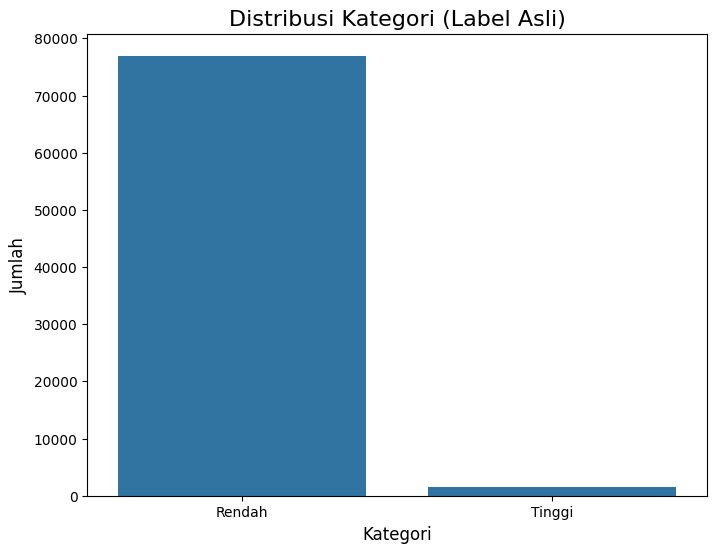

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengekspor data prediksi ke Pandas DataFrame
predictions_pd = predictions.select('labelIndex', 'prediction', 'COUNTY_CODE').toPandas()

# 1. Visualisasi Distribusi Kategori
plt.figure(figsize=(8, 6))
sns.countplot(data=predictions_pd, x='labelIndex', order=predictions_pd['labelIndex'].value_counts().index)
plt.title('Distribusi Kategori (Label Asli)', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks([0, 1], ['Rendah', 'Tinggi'], fontsize=10)
plt.show()

<Figure size 800x600 with 0 Axes>

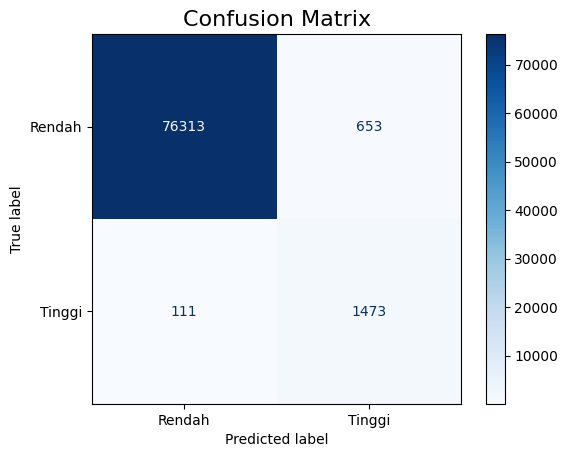

In [ ]:
# 2. Confusion Matrix
# Menghitung matriks kebingungan
cm = confusion_matrix(predictions_pd['labelIndex'], predictions_pd['prediction'])
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rendah', 'Tinggi'])

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

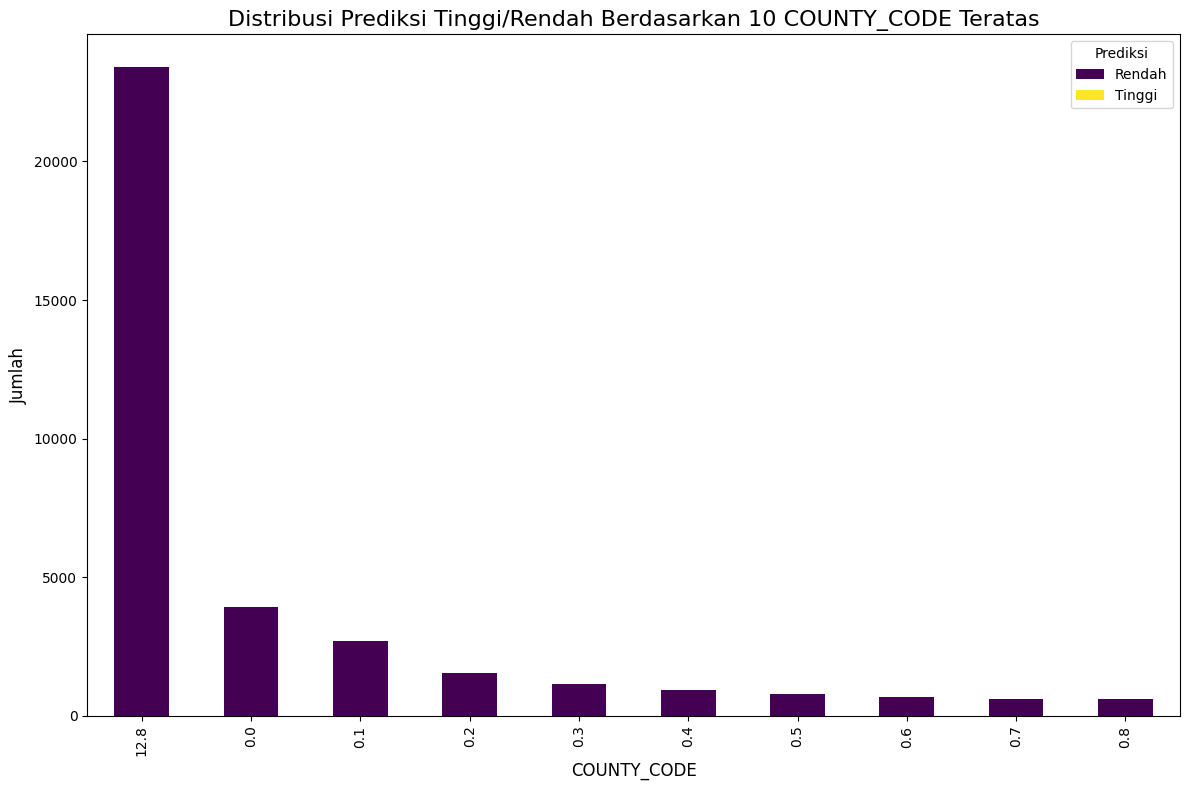

In [ ]:
# 6. Prediksi Tinggi Rendah Berdasarkan COUNTY_CODE
county_prediction_df = predictions_pd.groupby(['COUNTY_CODE', 'prediction']).size().reset_index(name='count')
county_pivot = county_prediction_df.pivot(index='COUNTY_CODE', columns='prediction', values='count').fillna(0)

# Menambahkan kolom total prediksi untuk sortasi
county_pivot['total'] = county_pivot.sum(axis=1)

# Mengambil 10 COUNTY_CODE dengan total prediksi tertinggi
top_counties = county_pivot.sort_values(by='total', ascending=False).head(10).drop(columns=['total'])

# Plot distribusi prediksi untuk 10 COUNTY_CODE teratas
top_counties.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribusi Prediksi Tinggi/Rendah Berdasarkan 10 COUNTY_CODE Teratas', fontsize=16)
plt.xlabel('COUNTY_CODE', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Prediksi', labels=['Rendah', 'Tinggi'], fontsize=10)
plt.tight_layout()
plt.show()